In [2]:
import pandas as pd


In [3]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv('hate-crime-dataset.csv')
crimesDF = df
crimesDF.head()

,State,Agency Type,Agency,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nidentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Population
0,Alaska,Cities,Anchorage,4.0,0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,"287,731"
1,Alaska,Cities,Fairbanks,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"31,493"
2,Alaska,Cities,Kotzebue,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"3,272"
3,Alaska,Cities,North Pole,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"2,111"
4,Alaska,Cities,Soldotna,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4,756"


## Change the column names
## Make 1st, 2nd, 3rd and 4th quarter pivot
## get rid of the decimal points
## delete or fill empty rows
## remove duplicates
## update data types for clarity


In [5]:
##Change the column names
crimesDF.rename(columns={'Race/\nEthnicity/\nAncestry':'Race'}, inplace=True)
crimesDF.rename(columns={'Sexual\norientation':'Sexual Orientation'}, inplace=True)
crimesDF.rename(columns={'Gender\nidentity':'Identity'}, inplace=True)
crimesDF.rename(columns={'1st\nquarter':'Quarter 1'}, inplace=True)
crimesDF.rename(columns={'2nd\nquarter':'Quarter 2'}, inplace=True)
crimesDF.rename(columns={'3rd\nquarter':'Quarter 3'}, inplace=True)
crimesDF.rename(columns={'4th\nquarter':'Quarter 4'}, inplace=True)
crimesDF.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Quarter 1,Quarter 2,Quarter 3,Quarter 4,Population
0,Alaska,Cities,Anchorage,4.0,0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,"287,731"
1,Alaska,Cities,Fairbanks,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"31,493"
2,Alaska,Cities,Kotzebue,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"3,272"
3,Alaska,Cities,North Pole,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,"2,111"
4,Alaska,Cities,Soldotna,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4,756"


~~## Change the column names~~
## Make 1st, 2nd, 3rd and 4th quarter melt
## get rid of the decimal points
## delete or fill empty rows
## remove duplicates
## update data types for clarity

In [6]:
meltcrimes = pd.melt(crimesDF, id_vars=['State','Agency Type', 'Agency', 'Race', 'Religion', 'Sexual Orientation',
                                    'Disability', 'Gender','Identity', 'Population'], var_name='Quarter',value_name='Count')
meltcrimes.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,Quarter,Count
0,Alaska,Cities,Anchorage,4.0,0,2.0,0.0,0.0,0.0,"287,731",Quarter 1,1.0
1,Alaska,Cities,Fairbanks,1.0,0,0.0,0.0,0.0,0.0,"31,493",Quarter 1,0.0
2,Alaska,Cities,Kotzebue,1.0,0,0.0,0.0,0.0,0.0,"3,272",Quarter 1,0.0
3,Alaska,Cities,North Pole,1.0,0,0.0,0.0,0.0,0.0,"2,111",Quarter 1,0.0
4,Alaska,Cities,Soldotna,0.0,0,2.0,0.0,0.0,0.0,"4,756",Quarter 1,0.0


In [7]:
#Remove all unfilled or NaN data

meltcrimes.dropna(subset=['State', 'Agency'], inplace=True)
meltcrimes.shape

(8668, 12)

In [8]:
meltcrimes.dropna(subset=['Race'], inplace=True)
#There are 4 entries by New Jersey that did not complete the data entry information

In [9]:
meltcrimes.isna().sum()
#Next we will look at Population and see why 2256 entries are NaN

State                    0
Agency Type              0
Agency                   0
Race                     0
Religion                 0
Sexual Orientation       0
Disability               0
Gender                   0
Identity                 0
Population            2256
Quarter                  0
Count                  271
dtype: int64

In [10]:
meltcrimes['Population'].fillna('Not Complete', inplace=True)
# All the data for these rows are complete except population and the row locations seem to be random
# let's substitute these for not complete

In [11]:
#next look at count column
meltcrimes['Count'].fillna(0, inplace=True)
#it seems all of these columns could be replaced with zero

In [12]:
meltcrimes.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,Quarter,Count
0,Alaska,Cities,Anchorage,4.0,0,2.0,0.0,0.0,0.0,"287,731",Quarter 1,1.0
1,Alaska,Cities,Fairbanks,1.0,0,0.0,0.0,0.0,0.0,"31,493",Quarter 1,0.0
2,Alaska,Cities,Kotzebue,1.0,0,0.0,0.0,0.0,0.0,"3,272",Quarter 1,0.0
3,Alaska,Cities,North Pole,1.0,0,0.0,0.0,0.0,0.0,"2,111",Quarter 1,0.0
4,Alaska,Cities,Soldotna,0.0,0,2.0,0.0,0.0,0.0,"4,756",Quarter 1,0.0


In [13]:
meltcrimes['Quarter'] = meltcrimes.Quarter.astype('category')

In [14]:
meltcrimes.dtypes

State                   object
Agency Type             object
Agency                  object
Race                   float64
Religion                object
Sexual Orientation     float64
Disability             float64
Gender                 float64
Identity               float64
Population              object
Quarter               category
Count                  float64
dtype: object

In [15]:
meltcrimes = meltcrimes.astype({'Race':'int', 'Sexual Orientation':'int', 'Disability': 'int', 'Gender': 'int','Identity': 'int','Count': 'int'})

In [16]:
meltcrimes.dtypes

State                   object
Agency Type             object
Agency                  object
Race                     int32
Religion                object
Sexual Orientation       int32
Disability               int32
Gender                   int32
Identity                 int32
Population              object
Quarter               category
Count                    int32
dtype: object

~~## Change the column names~~
~~## Make 1st, 2nd, 3rd and 4th quarter melt~~
~~## get rid of the decimal points~~
~~## delete or fill empty rows~~
## remove duplicates
~~## update data types for clarity~~

In [17]:
meltcrimes.duplicated().sum()
#no duplicates
meltcrimes.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,Quarter,Count
0,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",Quarter 1,1
1,Alaska,Cities,Fairbanks,1,0,0,0,0,0,"31,493",Quarter 1,0
2,Alaska,Cities,Kotzebue,1,0,0,0,0,0,"3,272",Quarter 1,0
3,Alaska,Cities,North Pole,1,0,0,0,0,0,"2,111",Quarter 1,0
4,Alaska,Cities,Soldotna,0,0,2,0,0,0,"4,756",Quarter 1,0


In [18]:
meltcrimes.loc[(meltcrimes['State']=='Arizona') & (meltcrimes['Agency']=='Phoenix')]

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,Quarter,Count
13,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",Quarter 1,31
2188,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",Quarter 2,43
4363,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",Quarter 3,33
6538,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",Quarter 4,44


In [19]:
hate_crimes_by_State = meltcrimes[['State','Agency Type', 'Agency','Race','Religion','Sexual Orientation','Disability','Gender','Identity','Population']]

In [20]:
hate_crimes_by_State.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population
0,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731"
1,Alaska,Cities,Fairbanks,1,0,0,0,0,0,"31,493"
2,Alaska,Cities,Kotzebue,1,0,0,0,0,0,"3,272"
3,Alaska,Cities,North Pole,1,0,0,0,0,0,"2,111"
4,Alaska,Cities,Soldotna,0,0,2,0,0,0,"4,756"


In [21]:
hate_crimes_by_State.shape

(8664, 10)

In [22]:
hate_crimes_by_State.drop_duplicates(inplace=True)

<ipython-input-22-7564b7e50b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_crimes_by_State.drop_duplicates(inplace=True)


In [23]:
hate_crimes_by_State.shape

(2166, 10)

In [24]:
hate_crimes_by_State['id'] = range(len(hate_crimes_by_State))

<ipython-input-24-dfab375469ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_crimes_by_State['id'] = range(len(hate_crimes_by_State))


In [25]:
hate_crimes_by_State.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,id
0,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0
1,Alaska,Cities,Fairbanks,1,0,0,0,0,0,"31,493",1
2,Alaska,Cities,Kotzebue,1,0,0,0,0,0,"3,272",2
3,Alaska,Cities,North Pole,1,0,0,0,0,0,"2,111",3
4,Alaska,Cities,Soldotna,0,0,2,0,0,0,"4,756",4


In [26]:
count_crimes_by_Quarter = meltcrimes[['State','Agency Type', 'Agency','Quarter','Count']]

In [27]:
count_crimes_by_Quarter.head()

,State,Agency Type,Agency,Quarter,Count
0,Alaska,Cities,Anchorage,Quarter 1,1
1,Alaska,Cities,Fairbanks,Quarter 1,0
2,Alaska,Cities,Kotzebue,Quarter 1,0
3,Alaska,Cities,North Pole,Quarter 1,0
4,Alaska,Cities,Soldotna,Quarter 1,0


In [28]:
count_crimes_by_Quarter.to_csv('crimes_by_quarter.csv', index= False)
hate_crimes_by_State.to_csv('crimes_by_state.csv', index = False)

In [29]:
merged_hate_crimes = hate_crimes_by_State.merge(
    count_crimes_by_Quarter, on=['State','Agency Type', 'Agency']
)

In [30]:
merged_hate_crimes.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,id,Quarter,Count
0,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0,Quarter 1,1
1,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0,Quarter 2,2
2,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0,Quarter 3,3
3,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0,Quarter 4,0
4,Alaska,Cities,Fairbanks,1,0,0,0,0,0,"31,493",1,Quarter 1,0


In [31]:
merged_hate_crimes.loc[(merged_hate_crimes['State']=='Arizona') & (merged_hate_crimes['Agency']=='Phoenix')]

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,id,Quarter,Count
52,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",13,Quarter 1,31
53,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",13,Quarter 2,43
54,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",13,Quarter 3,33
55,Arizona,Cities,Phoenix,111,20,23,0,2,3,"1,688,722",13,Quarter 4,44


## In the last few cells I melted the data to make it longer and less wide.
## After melting, I fully cleaned the data frame by removing duplicates, filling/deleting missing data, and properly changing data types/columns
## I realized I needed to separate the total # of States that reported hate crimes from the total # of rows
## so i created another df and deleted the duplicated rows (because of quarter & Count columns)
## next I created a separate df including the quarter count
## I lastly merged the 2 data frames with an id column, so if the user wants to research by id they can, or if they want to research by quarter they can

In [32]:
#now lets send it to csv
merged_hate_crimes.to_csv('merged_hate_crimes.csv', index = False)

## Which season on average has the highest rate of reported crimes (assuming q1=spring, q2=spring, q3=fall, q4=winter)?
---


In [33]:
q1 = count_crimes_by_Quarter.loc[count_crimes_by_Quarter['Quarter']=='Quarter 1']
q2 = count_crimes_by_Quarter.loc[count_crimes_by_Quarter['Quarter']=='Quarter 2']
q3 = count_crimes_by_Quarter.loc[count_crimes_by_Quarter['Quarter']=='Quarter 3']
q4 = count_crimes_by_Quarter.loc[count_crimes_by_Quarter['Quarter']=='Quarter 4']
q1_hatecrime_rates = q1['Count'].mean() *100
q2_hatecrime_rates = q2['Count'].mean() *100
q3_hatecrime_rates = q3['Count'].mean() *100
q4_hatecrime_rates = q4['Count'].mean() *100

Text(0, 0.5, 'Crime Rate by Percentage')

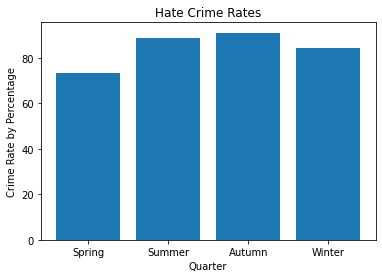

In [34]:
plt.bar(['Spring','Summer','Autumn','Winter'], [q1_hatecrime_rates,q2_hatecrime_rates,q3_hatecrime_rates,q4_hatecrime_rates])
plt.title('Hate Crime Rates')
plt.xlabel('Quarter')
plt.ylabel('Crime Rate by Percentage')


### Autumn has the highest reported crime rates. But summer comes in closely. This may be because people are outside more. Also people travel during this time.
### More data may need to be assessed and analyzed to ascertain data-driven correlation.

## What are the most common types of hate crimes reported?
---

In [35]:
hate_crimes_by_State.head()

,State,Agency Type,Agency,Race,Religion,Sexual Orientation,Disability,Gender,Identity,Population,id
0,Alaska,Cities,Anchorage,4,0,2,0,0,0,"287,731",0
1,Alaska,Cities,Fairbanks,1,0,0,0,0,0,"31,493",1
2,Alaska,Cities,Kotzebue,1,0,0,0,0,0,"3,272",2
3,Alaska,Cities,North Pole,1,0,0,0,0,0,"2,111",3
4,Alaska,Cities,Soldotna,0,0,2,0,0,0,"4,756",4


In [36]:
# Let's start by melting the df to make hate crime types one column
crime_types = pd.melt(hate_crimes_by_State, id_vars=['State', 'Agency Type', 'Agency','Population', 'id'], var_name='CrimeType',value_name='Number_Reported')
crime_types

,State,Agency Type,Agency,Population,id,CrimeType,Number_Reported
0,Alaska,Cities,Anchorage,"287,731",0,Race,4
1,Alaska,Cities,Fairbanks,"31,493",1,Race,1
2,Alaska,Cities,Kotzebue,"3,272",2,Race,1
3,Alaska,Cities,North Pole,"2,111",3,Race,1
4,Alaska,Cities,Soldotna,"4,756",4,Race,0
...,...,...,...,...,...,...,...
12991,Federal,Federal Agencies,"FBI Field Offices: Tampa, FL",Not Complete,2161,Identity,1
12992,Federal,Federal Agencies,"FBI Field Offices: Washington, DC",Not Complete,2162,Identity,0
12993,Federal,Federal Agencies,Pentagon Force Protection Agency,Not Complete,2163,Identity,0
12994,Federal,Federal Agencies,U.S. Navy Law Enforcement,Not Complete,2164,Identity,0


In [37]:
#Now lets change CrimeType to a categorical data type
crime_types['Number_Reported'] = crime_types['Number_Reported'].astype('int')

crime_types.dtypes

State              object
Agency Type        object
Agency             object
Population         object
id                  int32
CrimeType          object
Number_Reported     int32
dtype: object

In [38]:
crime_types['Number_Reported'].isna().sum()

0

In [59]:
race = crime_types.loc[crime_types['CrimeType']=='Race']['Number_Reported'].mean() *100
disability = crime_types.loc[crime_types['CrimeType']=='Disablity']['Number_Reported'].sum() #shows there were no reported hate crimes for disabilities cannot collect a mean
gender = crime_types.loc[crime_types['CrimeType']=='Gender']['Number_Reported'].mean() *100
identity = crime_types.loc[crime_types['CrimeType']=='Identity']['Number_Reported'].mean() *100
religion = crime_types.loc[crime_types['CrimeType']=='Religion']['Number_Reported'].mean() *100
sex_or = crime_types.loc[crime_types['CrimeType']=='Sexual Orientation']['Number_Reported'].mean() *100


191.13573407202216

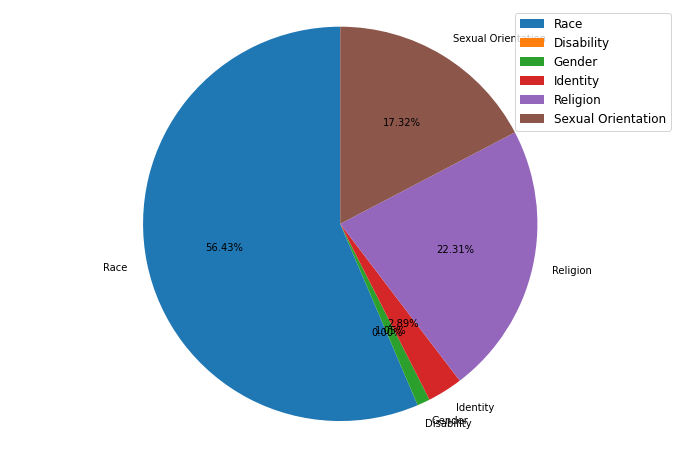

In [58]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'Race', 'Disability', 'Gender', 'Identity', 'Religion', 'Sexual Orientation'
sizes = [race, disability, gender, identity, religion, sex_or]

fig = plt.figure(1, figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')   #Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend( prop={'size': 12})

plt.show()

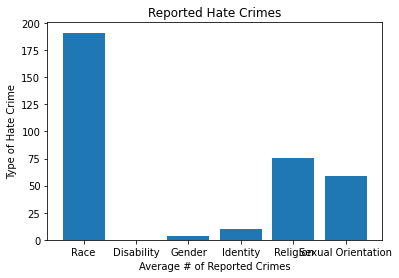

In [65]:
plt.bar(labels, sizes)
plt.title('Reported Hate Crimes')
plt.xlabel('Average # of Reported Crimes')
plt.ylabel('Type of Hate Crime')
plt.show()


### Race is the most common type of hate crime reported

## Does population affect the number of Hate Crimes reported?
---

In [67]:
crime_types.head()

,State,Agency Type,Agency,Population,id,CrimeType,Number_Reported
0,Alaska,Cities,Anchorage,"287,731",0,Race,4
1,Alaska,Cities,Fairbanks,"31,493",1,Race,1
2,Alaska,Cities,Kotzebue,"3,272",2,Race,1
3,Alaska,Cities,North Pole,"2,111",3,Race,1
4,Alaska,Cities,Soldotna,"4,756",4,Race,0


In [68]:
#We are going to compare relationship between population and number_reported.
#We have to make sure they are both integers
crime_types.dtypes

State              object
Agency Type        object
Agency             object
Population         object
id                  int32
CrimeType          object
Number_Reported     int32
dtype: object

In [120]:
crime_types.drop(crime_types[crime_types['Population']=='Not Complete'].index, inplace=True) #drop all rows were the population count is incomplete
crime_types['Population'] = crime_types['Population'].str.replace(',','').astype(int) #remove the commas and convert them to integers
crime_types.dtypes

State              object
Agency Type        object
Agency             object
Population          int32
id                  int32
CrimeType          object
Number_Reported     int32
dtype: object

Text(0.5, 0, 'Population in Millions')

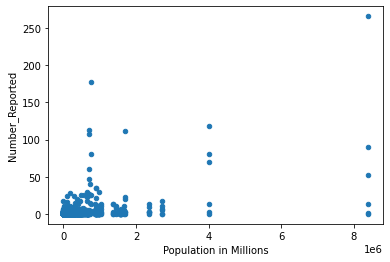

In [126]:
crime_types.plot(x='Population', y='Number_Reported', kind='scatter')
plt.xlabel('Population in Millions')


In [124]:
pop_mask.max()

8379043

In [123]:
crime_types.corr()

,Population,id,Number_Reported
Population,1.000000,-0.045513,0.473677
id,-0.045513,1.000000,-0.016388
Number_Reported,0.473677,-0.016388,1.000000
